В датасете присутствует расхождение медианных и средних значений по покупке продуктов


## Столбцы

### Люди

__Dt_Customer__ - дата регистрации клиента в компании  
__Recency__ - колличество дней с последней покупки  
__Complain__ - 1 если клиент жаловался в течении последних двух лет, в остальных случаях 0  

### Продукты

__MntWines__ - сумма, потраченная на вино за последние 2 года  
__MntFruits__ - на фрукты  
__MntMeatProducts__ - на мясо  
__MntFishProducts__ - на рыбу  
__MntSweetProducts__ - на сладкое  
__MntGoldProds__ - на золото  

### Promo

__NumDealsPurchases__ - кол-во покупок сделанных со скидкой  
__AcceptedCmp1__ - 1 если клиент принял участие в первой кампании, 0 в других случаях  
__AcceptedCmp2__ - во второй кампании  
__AcceptedCmp3__ - в третьей кампании  
__AcceptedCmp4__ - в четвертой кампании  
__AcceptedCmp5__ - в пятой кампании  
__Response__ - в последней кампании  

### Источник

__NumWebPurchases__ - кол-во покупок, сделанных через веб-сайт компании  
__NumCatalogPurchases__ - с помощью каталога  
__NumStorePurchases__ - в магазине  
__NumWebVisitsMonth__ - кол-во посещений сайта за последний месяц  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep= '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df['ID'].nunique()

2240

### Исследование кампаний на колличество участников

In [7]:
df['AcceptedCmp1'].value_counts(normalize= True)

0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64

In [8]:
df['AcceptedCmp2'].value_counts(normalize= True)

0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64

In [9]:
df['AcceptedCmp3'].value_counts(normalize= True)

0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64

In [10]:
df['AcceptedCmp4'].value_counts(normalize= True)

0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64

In [11]:
df['AcceptedCmp5'].value_counts(normalize= True)

0    0.927232
1    0.072768
Name: AcceptedCmp5, dtype: float64

In [12]:
df['Response'].value_counts(normalize= True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

### Промежуточные выводы

в кампаниях участвовал очень маленький процент клиентов, дальнейшие исследования не показательны

In [13]:
df['Education'].value_counts(normalize= True) # Распределение клиентов по уровню образования

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [14]:
df['NumDealsPurchases'].value_counts() # Распределение клиентов по количеству покупок со скидкой

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [15]:
df['Marital_Status'].value_counts() # Распределение клиентов по семейному статусу

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
df = df[(df['Marital_Status'] != 'Alone') & (df['Marital_Status'] != 'Absurd') & (df['Marital_Status'] != 'YOLO')]

### Изменение датасета

Были удалены 7 строк с данными по столбцу Marital_Status: Alone, Absurd, YOLO

<AxesSubplot:>

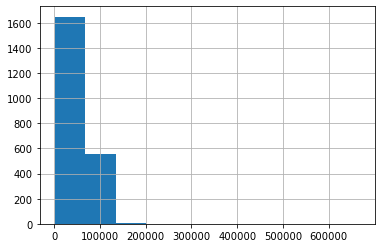

In [17]:
df['Income'].hist() # гистограмма доходов

In [18]:
df = df[df['Income'] < 150000]

### Изменение датасета

удалил строки с доходом свыше 150 000, удалено 5 значений, которые сильно выбивались из общей картины

In [19]:
df['Kidhome'].value_counts() # распределение клиентов по количеству детей

0    1274
1     881
2      46
Name: Kidhome, dtype: int64

In [20]:
df['Teenhome'].value_counts() # распределение клиентов по количеству детей-подростков

0    1138
1    1012
2      51
Name: Teenhome, dtype: int64

<AxesSubplot:>

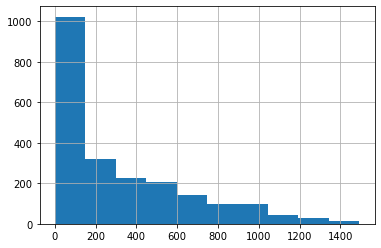

In [21]:
df['MntWines'].hist() # распределение суммы потраченной на вино за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntWines'>

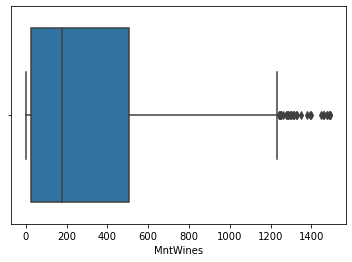

In [22]:
sns.boxplot(df['MntWines'])

<AxesSubplot:>

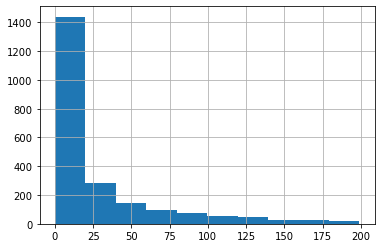

In [23]:
df['MntFruits'].hist() # распределение суммы потраченной на фрукты за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntFruits'>

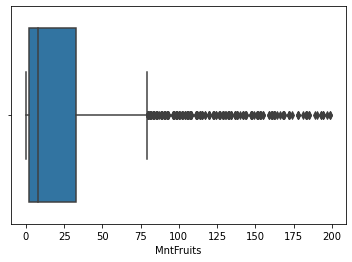

In [24]:
sns.boxplot(df['MntFruits'])

<AxesSubplot:>

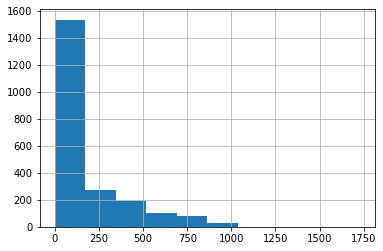

In [25]:
df['MntMeatProducts'].hist() # распределение суммы потраченной на мясо за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntMeatProducts'>

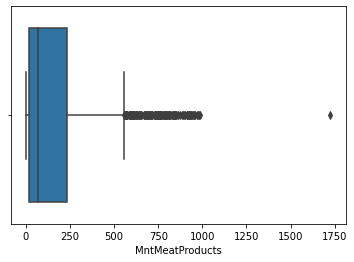

In [26]:
sns.boxplot(df['MntMeatProducts'])

<AxesSubplot:>

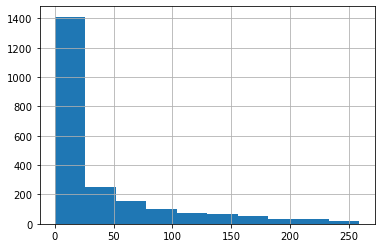

In [27]:
df['MntFishProducts'].hist() # распределение суммы потраченной на рыбу за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntFishProducts'>

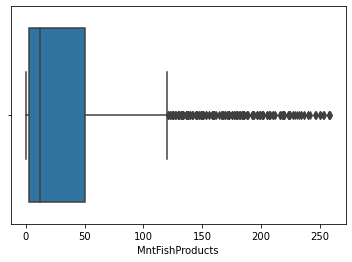

In [28]:
sns.boxplot(df['MntFishProducts'])

<AxesSubplot:>

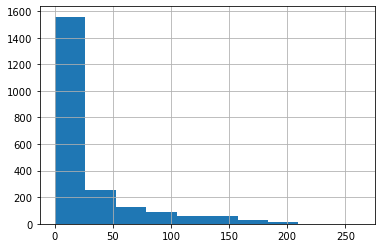

In [29]:
df['MntSweetProducts'].hist() # распределение суммы потраченной на сладкое за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntSweetProducts'>

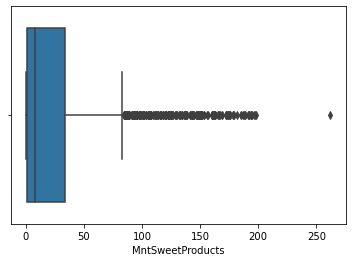

In [30]:
sns.boxplot(df['MntSweetProducts'])

<AxesSubplot:>

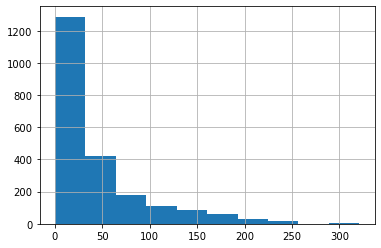

In [31]:
df['MntGoldProds'].hist() # распределение суммы потраченной на золото за последние 2 года

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntGoldProds'>

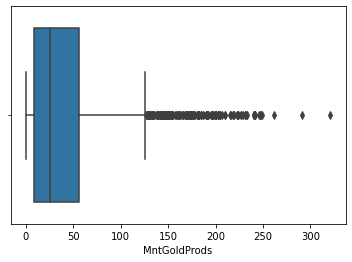

In [32]:
sns.boxplot(df['MntGoldProds'])

### Промежуточный вывод:

из исследований видно, что имееются большие расхождения медианных и средних значений, в связи с чем можно сделать вывод, что в дальнейшем можно будет разделить клиентов на кластеры

In [33]:
df['age'] =  2023 - df['Year_Birth'] # Создал столбец с возрастом клиентов на основе даты рождения

In [34]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42


<AxesSubplot:>

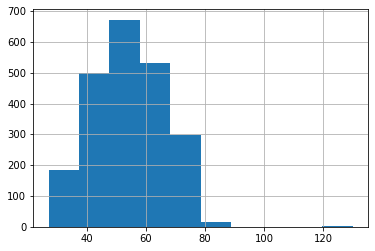

In [35]:
df['age'].hist() # Распределение клиентов по возрастам

In [36]:
df['age'].describe()

count    2201.000000
mean       54.208087
std        11.987052
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: age, dtype: float64

<AxesSubplot:>

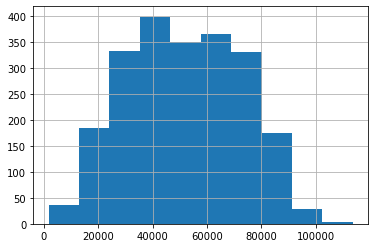

In [37]:
df['Income'].hist() # Гистограмма доходов клиентов

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

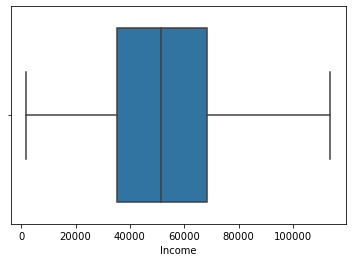

In [38]:
sns.boxplot(df['Income'])

In [39]:
df['Income'].describe()

count      2201.000000
mean      51628.401181
std       20728.522412
min        1730.000000
25%       35196.000000
50%       51315.000000
75%       68316.000000
max      113734.000000
Name: Income, dtype: float64

### Гипотеза 

Чем больше клиент зарабатывает - тем больше он тратит

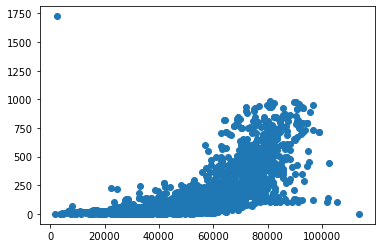

In [40]:
plt.scatter(df[df['Income'] < 600000]['Income'], df[df['Income'] < 600000]['MntMeatProducts']) # график зависимости расходов на мясо от доходов

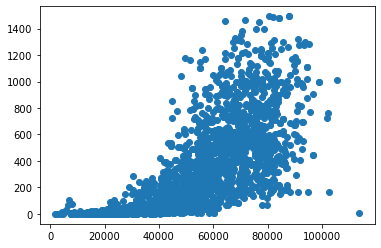

In [41]:
plt.scatter(df[df['Income'] < 600000]['Income'], df[df['Income'] < 600000]['MntWines'])  # график зависимости расходов на вино от доходов

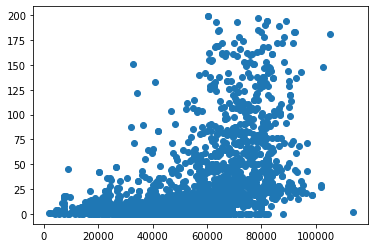

In [42]:
plt.scatter(df[df['Income'] < 600000]['Income'], df[df['Income'] < 600000]['MntFruits'])  # график зависимости расходов на фрукты от доходов

### Промежуточный вывод:

присутствует прямая зависимость сумм трат от уровня дохода клиентов

### Гипотеза

клиенты разного возраста предпочитают совершать покупки на разных платформах

Text(0, 0.5, 'кол-во покупок')

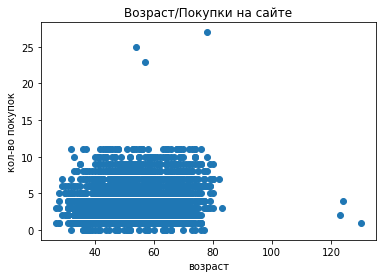

In [43]:
plt.scatter(df['age'], df['NumWebPurchases']) # график зависимости покупок на сайте от возраста
plt.title('Возраст/Покупки на сайте')
plt.xlabel('возраст')
plt.ylabel("кол-во покупок")

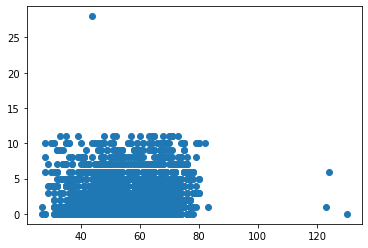

In [44]:
plt.scatter(df['age'], df['NumCatalogPurchases']) # график зависимости покупок через каталог от возраста

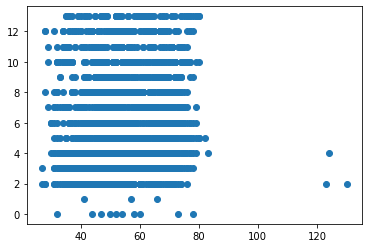

In [45]:
plt.scatter(df['age'], df['NumStorePurchases']) # график зависимости покупок в физическом магазине от возраста

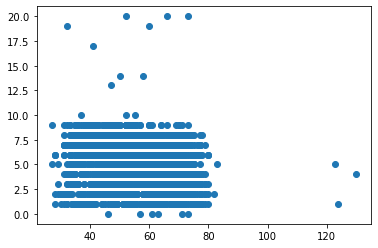

In [46]:
plt.scatter(df['age'], df['NumWebVisitsMonth']) # график зависимости посещений сайта от возраста

### промежуточные выводы:

Проверял гипотезу зависимости количества покупок на разных платформах от возраста. Зависимости нет.

### Гипотеза 

чем выше доход клиента, чем больше покупок он совершает в физических магазинах

In [47]:
share_store = df['NumStorePurchases'] / (df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']) # определил долю покупок, совершаемую в магазинах 

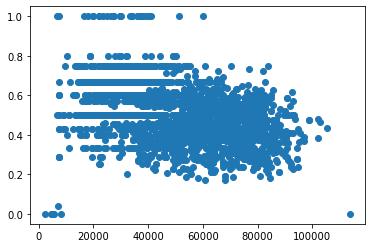

In [48]:
plt.scatter(df['Income'], share_store) # график зависимости количества покупок в магазинах от уровня дохода

### промежуточные выводы:
Проверял гипотезу зависимости количества посещений физических магазинов от уровня дохода. Зависимости нет.

### Гипотеза

Клиенты с меньшим достатком чаще покупают по скидкам

In [49]:
df.groupby('NumDealsPurchases')['Income'].mean() 

NumDealsPurchases
0     75680.871795
1     56067.001043
2     46855.989837
3     45851.955479
4     46825.623656
5     50189.857143
6     48510.283333
7     53641.051282
8     54141.928571
9     51280.625000
10    57859.800000
11    63702.800000
12    55832.333333
13    55281.666667
15    16707.400000
Name: Income, dtype: float64

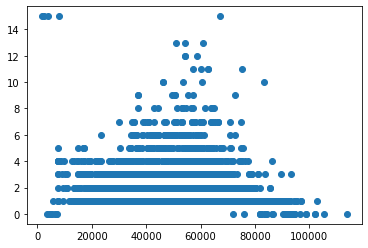

In [50]:
plt.scatter(df['Income'], df['NumDealsPurchases']) # График зависимости количества покупок по скидкат от уровня дохода

### Промежуточные выводы

Гипотеза подтвердилась, клиенты с наибольшим достатком не приобретали товары по скидкам, а клиенты с наименьшим достатком совершили наибольшее колличество таких покупок

### Гипотеза

Клиенты с более высоким уровнем дохода чаще покупают через сайт

In [51]:
share_web = df['NumWebPurchases'] / (df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']) # определил долю покупок, совершаемую через сайт 

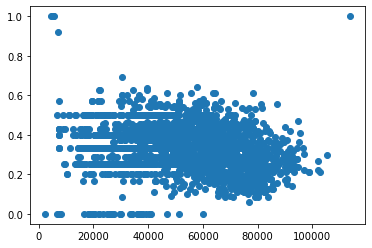

In [52]:
plt.scatter(df['Income'], share_web) # График зависимости покупок через сайт от уровня дохода

### Промежуточные выводы:

Проверял гипотезу, что клиенты с более высоким уровнем дохода чаще покупают через сайт, гипотеза не подтвердилась, корреляции нет

### Гипотеза:

Клиенты с более высоким уровнем дохода чаще заказывают через каталог

In [53]:
share_catalog = df['NumCatalogPurchases'] / (df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']) # определил долю покупок, совершаемую через каталог

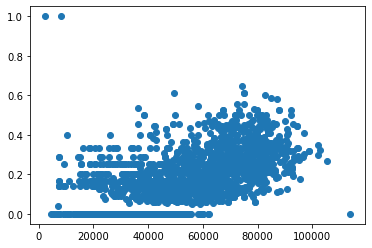

In [54]:
plt.scatter(df['Income'], share_catalog) # график зависимости количества покупок через каталог от уровня дохода

### Промежуточные выводы:

Проверял гипотезу, что клиенты с более высоким уровнем дохода чаще заказывают через каталог, гипотеза подтвердилась, есть небольшая корреляция

### Гипотеза:

чем больше детей, тем больше расходы на сладкое

In [55]:
df.groupby('Kidhome')['MntSweetProducts'].mean() # группировка расходов на сладкое по количеству детей

Kidhome
0    40.818681
1     8.644722
2     3.891304
Name: MntSweetProducts, dtype: float64

<AxesSubplot:>

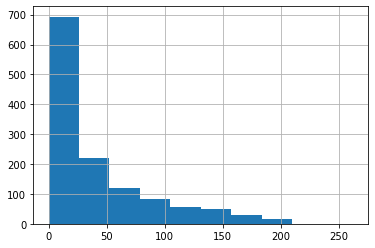

In [56]:
df[df['Kidhome'] == 0]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов без детей

<AxesSubplot:>

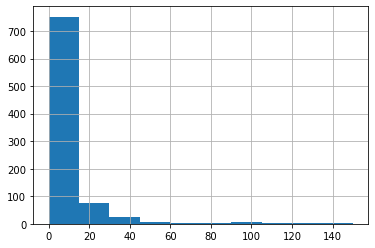

In [57]:
df[df['Kidhome'] == 1]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов с одним ребенком

<AxesSubplot:>

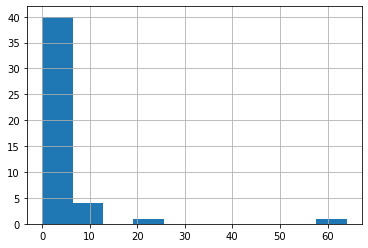

In [58]:
df[df['Kidhome'] == 2]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов с двумя детьми

In [59]:
df.groupby('Teenhome')['MntSweetProducts'].mean() # группировка расходов на сладкое по количеству детей-подростков

Teenhome
0    33.743409
1    20.367589
2    15.411765
Name: MntSweetProducts, dtype: float64

<AxesSubplot:>

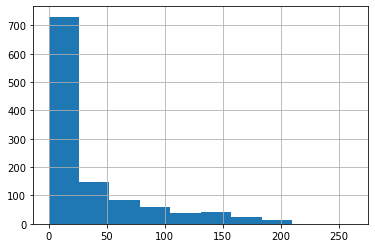

In [60]:
df[df['Teenhome'] == 0]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов без детей-подростков

<AxesSubplot:>

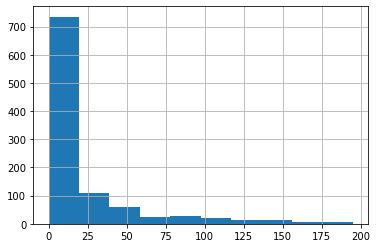

In [61]:
df[df['Teenhome'] == 1]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов с одним подростком

<AxesSubplot:>

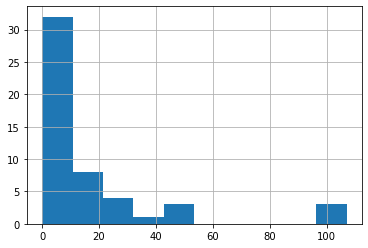

In [62]:
df[df['Teenhome'] == 2]['MntSweetProducts'].hist() # гистограмма расходов на сладкое клиентов с двумя подростками

### Промежуточные выводы:

- Основная часть людей тратит на сладкое примерно одинаковые суммы, однако есть в каждой категории группы сладкоежек, и в категории без детей их больше.
- Исследования клиентов с двумя детьми и двумя подростками малопоказательные, так как мало данных

### Гипотеза:

чем больше детей, тем больше траты на фрукты

In [63]:
df.groupby('Kidhome')['MntFruits'].mean() # группировка расходов на фрукты по количеству детей

Kidhome
0    39.525903
1     8.567537
2     6.043478
Name: MntFruits, dtype: float64

<AxesSubplot:>

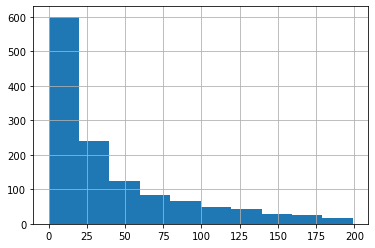

In [64]:
df[df['Kidhome'] == 0]['MntFruits'].hist() # гистограмма расходов на фрукты клиентов без детей

<AxesSubplot:>

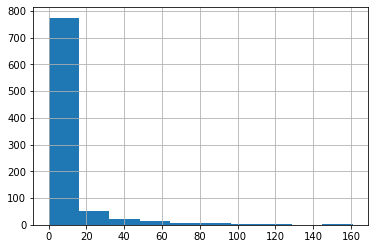

In [65]:
df[df['Kidhome'] == 1]['MntFruits'].hist() # гистограмма расходов на фрукты клиентов с одним ребенком

In [66]:
df.groupby('Teenhome')['MntFruits'].mean() # группировка расходов на фрукты по количеству детей-подростков

Teenhome
0    33.424429
1    19.025692
2    17.470588
Name: MntFruits, dtype: float64

<AxesSubplot:>

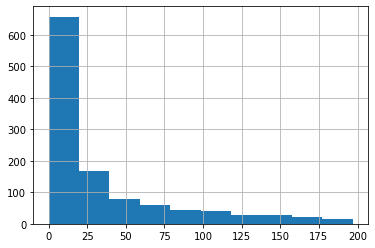

In [67]:
df[df['Teenhome'] == 0]['MntFruits'].hist() # гистограмма расходов на фрукты клиентов без детей-подростков

<AxesSubplot:>

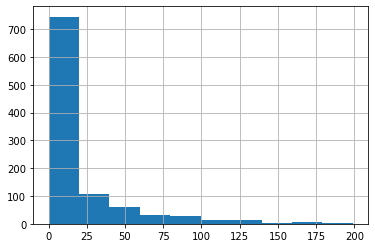

In [68]:
df[df['Teenhome'] == 1]['MntFruits'].hist() # гистограмма расходов на фрукты клиентов с одним подростком

### Промежуточные выводы:

результат схож с исследованием расходов на сладкое, в каждой категории тратятся, в основном, одинаковые суммы, но есть небольшая категория клиентов в каждой группе с особо большими расходами

### Гипотеза:

Пары, которые встречаются больше тратят на вино

In [69]:
df.groupby('Marital_Status')['MntWines'].mean() # Средние траты на вино с сортировкой по семейному статусу 

Marital_Status
Divorced    326.246753
Married     300.818501
Single      291.331210
Together    310.335677
Widow       367.131579
Name: MntWines, dtype: float64

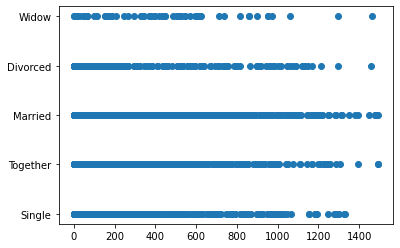

In [70]:
plt.scatter(df['MntWines'], df['Marital_Status']) # график зависимости трат на вино от семейного статуса

<AxesSubplot:>

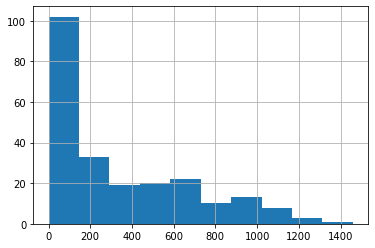

In [71]:
df[df['Marital_Status'] == 'Divorced']['MntWines'].hist() # Гистограмма по расходам на вино у разведенных клиентов

<AxesSubplot:>

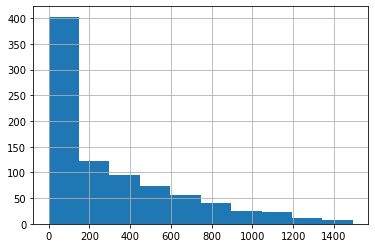

In [72]:
df[df['Marital_Status'] == 'Married']['MntWines'].hist() # Гистограмма по расходам на вино у женатых клиентов

<AxesSubplot:>

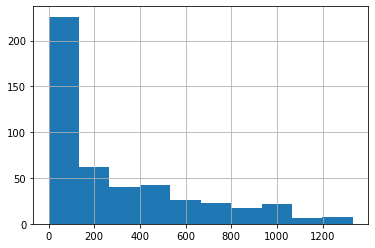

In [73]:
df[df['Marital_Status'] == 'Single']['MntWines'].hist() # Гистограмма по расходам на вино у одиноких клиентов

<AxesSubplot:>

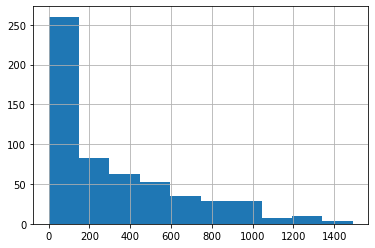

In [74]:
df[df['Marital_Status'] == 'Together']['MntWines'].hist() # Гистограмма по расходам на вино у клиентов, которые встречаются

<AxesSubplot:>

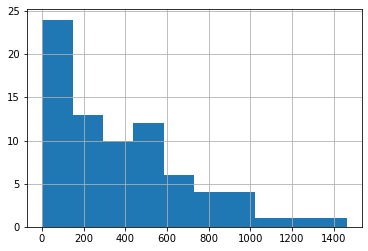

In [75]:
df[df['Marital_Status'] == 'Widow']['MntWines'].hist() # Гистограмма по расходам на вино у вдов(цов)

### Промежуточные выводы:

по средним значениям больше всех тратят вдовы/вдовцы, следом за ними идут разведенные, однако, это объясняется гораздо меньшим количеством людей в данных группах. Общая картина получается схожая с другими исследованиями по расходам, основная часть клиентов тратит примерно одинаковые суммы

### Исследование

зависимости трат от семейного статуса

### Фрукты

In [76]:
df.groupby('Marital_Status')['MntFruits'].mean() # Средние траты на фрукты с сортировкой по семейному статусу 

Marital_Status
Divorced    27.541126
Married     25.716628
Single      27.261146
Together    25.652021
Widow       31.868421
Name: MntFruits, dtype: float64

<AxesSubplot:>

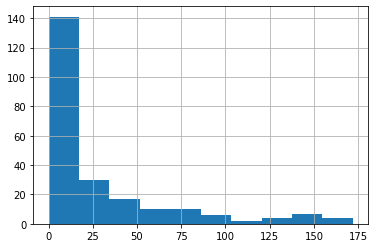

In [77]:
df[df['Marital_Status'] == 'Divorced']['MntFruits'].hist() # Гистограмма по расходам на фрукты у разведенных клиентов

<AxesSubplot:>

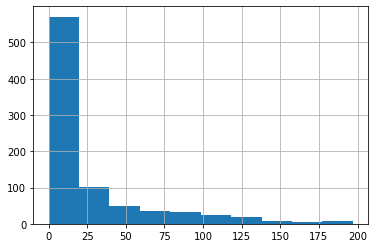

In [78]:
df[df['Marital_Status'] == 'Married']['MntFruits'].hist() # Гистограмма по расходам на фрукты у женатых клиентов

<AxesSubplot:>

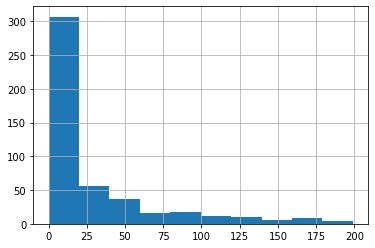

In [79]:
df[df['Marital_Status'] == 'Single']['MntFruits'].hist() # Гистограмма по расходам на фрукты у одиноких клиентов

<AxesSubplot:>

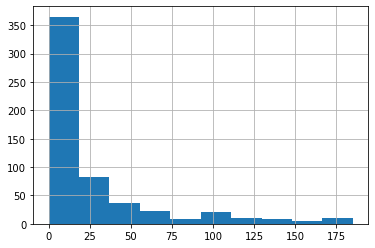

In [80]:
df[df['Marital_Status'] == 'Together']['MntFruits'].hist() # Гистограмма по расходам на фрукты у клиентов в отношениях

<AxesSubplot:>

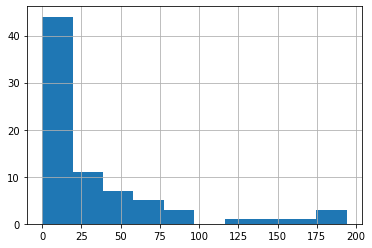

In [81]:
df[df['Marital_Status'] == 'Widow']['MntFruits'].hist() # Гистограмма по расходам на фрукты у вдов(цов)



### Мясо

In [82]:
df.groupby('Marital_Status')['MntMeatProducts'].mean() # Средние траты на мясо с сортировкой по семейному статусу 

Marital_Status
Divorced    150.852814
Married     157.707260
Single      184.849257
Together    164.509666
Widow       185.328947
Name: MntMeatProducts, dtype: float64

<AxesSubplot:>

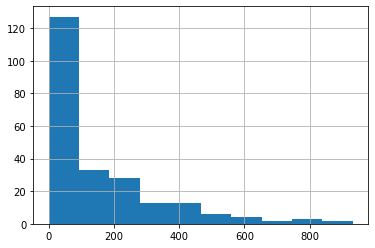

In [83]:
df[df['Marital_Status'] == 'Divorced']['MntMeatProducts'].hist() # Гистограмма по расходам на мясо у разведенных клиентов

<AxesSubplot:>

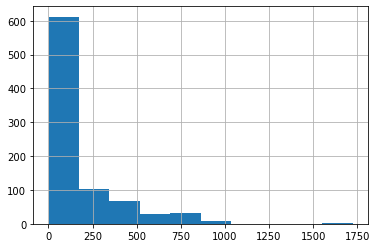

In [84]:
df[df['Marital_Status'] == 'Married']['MntMeatProducts'].hist() # Гистограмма по расходам на мясо у женатых клиентов

<AxesSubplot:>

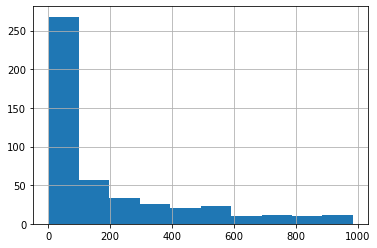

In [85]:
df[df['Marital_Status'] == 'Single']['MntMeatProducts'].hist() # Гистограмма по расходам на мясо у одиноких клиентов

<AxesSubplot:>

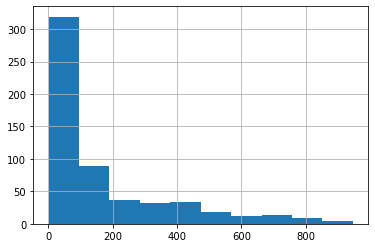

In [86]:
df[df['Marital_Status'] == 'Together']['MntMeatProducts'].hist() # Гистограмма по расходам на мясо у клиентов в отношениях

<AxesSubplot:>

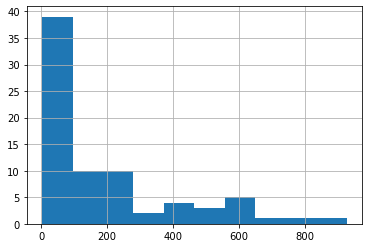

In [87]:
df[df['Marital_Status'] == 'Widow']['MntMeatProducts'].hist() # Гистограмма по расходам на мясо у вдов(цов)



### Рыба

In [88]:
df.groupby('Marital_Status')['MntFishProducts'].mean() # Средние траты на рыбу с сортировкой по семейному статусу 

Marital_Status
Divorced    35.190476
Married     35.569087
Single      38.772824
Together    39.312830
Widow       49.907895
Name: MntFishProducts, dtype: float64

<AxesSubplot:>

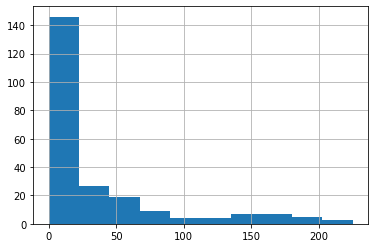

In [89]:
df[df['Marital_Status'] == 'Divorced']['MntFishProducts'].hist() # Гистограмма по расходам на рыбу у разведенных клиентов

<AxesSubplot:>

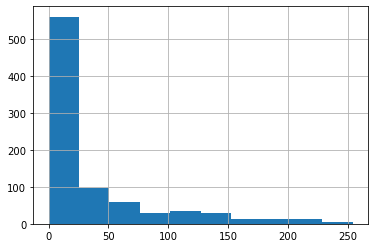

In [90]:
df[df['Marital_Status'] == 'Married']['MntFishProducts'].hist() # Гистограмма по расходам на рыбу у женатых клиентов

<AxesSubplot:>

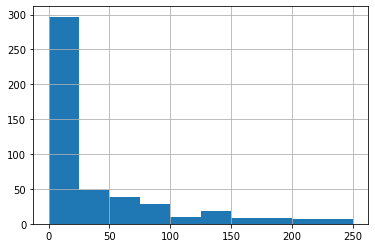

In [91]:
df[df['Marital_Status'] == 'Single']['MntFishProducts'].hist() # Гистограмма по расходам на рыбу у одиноких клиентов

<AxesSubplot:>

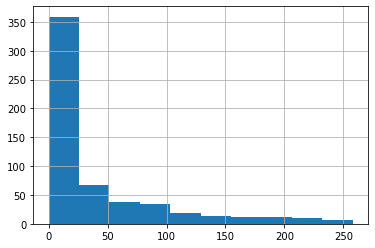

In [92]:
df[df['Marital_Status'] == 'Together']['MntFishProducts'].hist() # Гистограмма по расходам на рыбу у клиентов в отношениях

<AxesSubplot:>

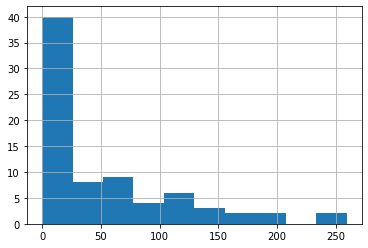

In [93]:
df[df['Marital_Status'] == 'Widow']['MntFishProducts'].hist() # Гистограмма по расходам на рыбу у вдов(цов)



### Сладкое

In [94]:
df.groupby('Marital_Status')['MntSweetProducts'].mean() # Средние траты на сладкое с сортировкой по семейному статусу 

Marital_Status
Divorced    26.930736
Married     26.838407
Single      27.072187
Together    26.411248
Widow       37.868421
Name: MntSweetProducts, dtype: float64

<AxesSubplot:>

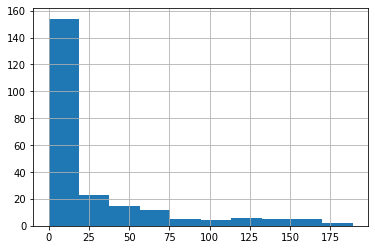

In [95]:
df[df['Marital_Status'] == 'Divorced']['MntSweetProducts'].hist() # Гистограмма по расходам на сладкое у разведенных клиентов

<AxesSubplot:>

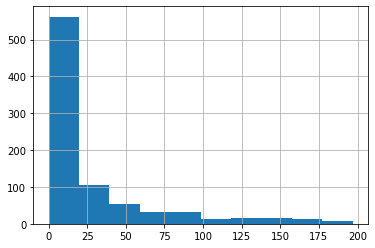

In [96]:
df[df['Marital_Status'] == 'Married']['MntSweetProducts'].hist() # Гистограмма по расходам на сладкое у женатых клиентов

<AxesSubplot:>

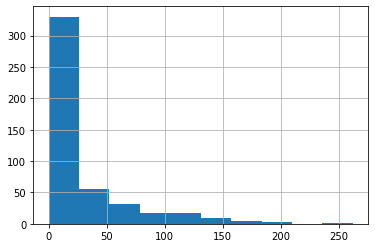

In [97]:
df[df['Marital_Status'] == 'Single']['MntSweetProducts'].hist() # Гистограмма по расходам на сладкое у одиноких клиентов

<AxesSubplot:>

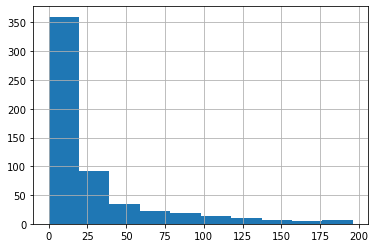

In [98]:
df[df['Marital_Status'] == 'Together']['MntSweetProducts'].hist() # Гистограмма по расходам на сладкое у клиентов в отношениях

<AxesSubplot:>

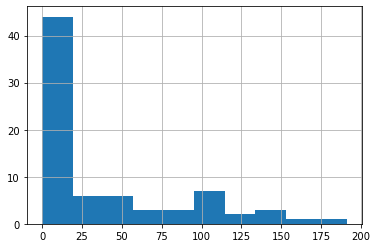

In [99]:
df[df['Marital_Status'] == 'Widow']['MntSweetProducts'].hist() # Гистограмма по расходам на сладкое у вдов(цов)

Траты на сладкое значительно преобладают у вдов

### Золото

In [100]:
df.groupby('Marital_Status')['MntGoldProds'].mean() # Средние траты на золото с сортировкой по семейному статусу 

Marital_Status
Divorced    46.484848
Married     42.989461
Single      43.305732
Together    43.463972
Widow       55.855263
Name: MntGoldProds, dtype: float64

<AxesSubplot:>

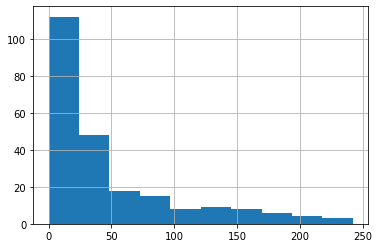

In [101]:
df[df['Marital_Status'] == 'Divorced']['MntGoldProds'].hist() # Гистограмма по расходам на золото у разведенных клиентов

<AxesSubplot:>

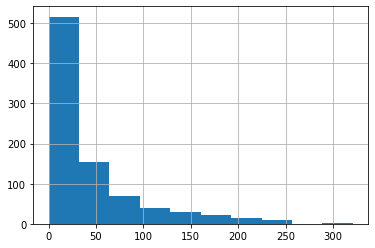

In [102]:
df[df['Marital_Status'] == 'Married']['MntGoldProds'].hist() # Гистограмма по расходам на золото у женатых клиентов

<AxesSubplot:>

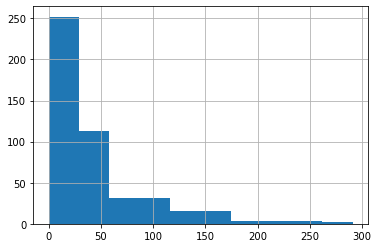

In [103]:
df[df['Marital_Status'] == 'Single']['MntGoldProds'].hist() # Гистограмма по расходам на золото у одиноких клиентов

<AxesSubplot:>

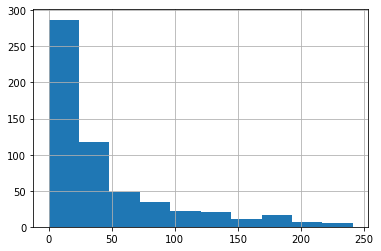

In [104]:
df[df['Marital_Status'] == 'Together']['MntGoldProds'].hist() # Гистограмма по расходам на золото у клиентов в отношениях

<AxesSubplot:>

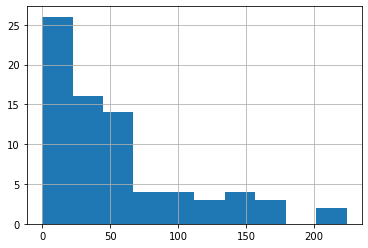

In [105]:
df[df['Marital_Status'] == 'Widow']['MntGoldProds'].hist() # Гистограмма по расходам на золото у вдов(цов)

### Промежуточные выводы

На основании проведенных выше исследований по расходам мы можем разделить наших клиентов на несколько групп.  
Поделим их на три группы:
1. 0 - 0.25% значений
2. 0.25% - 0.75% значений
3. 0.75% - 100% значений

In [106]:
pd.cut(df['MntWines'], bins = 3, include_lowest = True)

0       (497.667, 995.333]
1        (-1.494, 497.667]
2        (-1.494, 497.667]
3        (-1.494, 497.667]
4        (-1.494, 497.667]
               ...        
2235    (497.667, 995.333]
2236     (-1.494, 497.667]
2237    (497.667, 995.333]
2238     (-1.494, 497.667]
2239     (-1.494, 497.667]
Name: MntWines, Length: 2201, dtype: category
Categories (3, interval[float64, right]): [(-1.494, 497.667] < (497.667, 995.333] < (995.333, 1493.0]]

### Изменение датасета

создаем новые столбцы с расходами клиентов с разбивкой на наши три группы

In [107]:
df['wine_groups'] = pd.qcut(df['MntWines'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по вину

In [108]:
df['wine_groups'].value_counts()

Тратят умеренно    1093
Тратят мало         558
Тратят много        550
Name: wine_groups, dtype: int64

In [109]:
df['fruit_groups'] = pd.qcut(df['MntFruits'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по фруктам

In [110]:
df['meat_groups'] = pd.qcut(df['MntMeatProducts'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по мясу

In [111]:
df['fish_groups'] = pd.qcut(df['MntFishProducts'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по рыбе

In [112]:
df['sweet_groups'] = pd.qcut(df['MntSweetProducts'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по сладкому

In [113]:
df['gold_groups'] = pd.qcut(df['MntGoldProds'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много']) # Столбец с данными по золоту

In [114]:
df.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,wine_groups,fruit_groups,meat_groups,fish_groups,sweet_groups,gold_groups
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,66,Тратят много,Тратят много,Тратят много,Тратят много,Тратят много,Тратят много
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,69,Тратят мало,Тратят мало,Тратят мало,Тратят мало,Тратят мало,Тратят мало
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,58,Тратят умеренно,Тратят много,Тратят умеренно,Тратят много,Тратят умеренно,Тратят умеренно
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,39,Тратят мало,Тратят умеренно,Тратят умеренно,Тратят умеренно,Тратят умеренно,Тратят мало
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,42,Тратят умеренно,Тратят много,Тратят умеренно,Тратят умеренно,Тратят умеренно,Тратят умеренно


In [115]:
df['gold_groups'].value_counts()

Тратят умеренно    1074
Тратят мало         577
Тратят много        550
Name: gold_groups, dtype: int64

In [116]:
df.groupby('wine_groups')['Income'].mean() # соотношение расходов на вино и доходов

wine_groups
Тратят мало        28354.057348
Тратят умеренно    53332.548948
Тратят много       71854.674545
Name: Income, dtype: float64

In [117]:
corr_matrix = df[['age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].corr() # создаем переменную с необходимыми столбцами для создания матрицы корреляции

<AxesSubplot:>

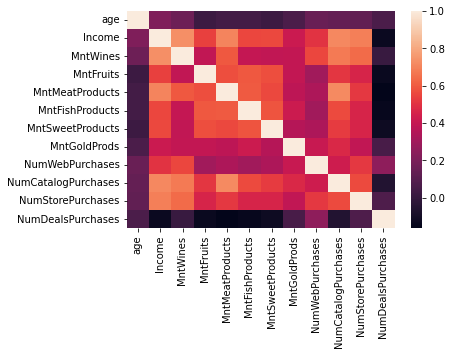

In [118]:
sns.heatmap(corr_matrix) # матрица корреляции

### Результаты матрицы корреляции

1. __Возраст.__ Значения возраста не коррелируют ни с одним показателем.
2. __Доход.__ Данные по доходу имеют прямую корреляцию с доходами и отсутствует в отношении количества покупок со скидками.
3. __Траты на вино.__ Данные напрямую коррелируют с тратами на мясо. С другими продуктами корреляция меньше. Чаще всего вино покупают в каталогах, затем идут магазины и сайт
4. __Траты на фрукты.__ Данные коррелируют с тратами на мясо, рыбу и сладости. Меньше - с вином и золотом. Покупается чаще через каталог, на втором месте магазин, через сайт практически не реализуется.
5. __Траты на мясо.__ Данные коррелируют со всеми продуктами, кроме золота, с ним значение ниже. Лучше всего продается через каталог, похуже - в магазине, на сайте очень редко.
6. __Траты на рыбу.__ Данные коррелируют с фруктами, мясом и сладким, меньше - с вином и золотом. Продажи, так же, через каталог, на втором месте магазин, редко - сайт.
7. __Траты на сладкое.__ Данные коррелируют с фруктами, мясом и рыбой, меньше - с вином и золотом. Продажи чаще через каталог, затем магазины, редко - сайт.
8. __Траты на золото.__ Корреляция со всеми товарами низкая. Покупка происходит чаще через каталог, на сайте и в магазине примерно с одинаковой частотой.
9. __Покупки через сайт.__ Чаще всего через сайт покупают вино, остальное - гораздо реже.
10. __Покупки с каталога.__ Чаще всего через каталог покупают вино и мясо, с остальными продуктами корреляция ниже.
11. __Покупки в магазине.__ В магазине чаще берут вино, с остальными продуктами корреляция ниже. 
12. __Покупки по скидкам.__ Данные не коррелируют ни с одним столбцом

кластеризация, карпов курсы

# Исследования групп клиентов



In [119]:
df['sum_groups'] = df[['wine_groups', 'fruit_groups', 'meat_groups', 'fish_groups', 'sweet_groups', 'gold_groups']].agg('_'.join, axis=1)

In [120]:
df['sum_groups'].value_counts(normalize= True).head(10)

Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно    0.069514
Тратят мало_Тратят мало_Тратят мало_Тратят мало_Тратят мало_Тратят мало                            0.057701
Тратят умеренно_Тратят мало_Тратят мало_Тратят мало_Тратят мало_Тратят мало                        0.042708
Тратят много_Тратят много_Тратят много_Тратят много_Тратят много_Тратят много                      0.031804
Тратят мало_Тратят умеренно_Тратят мало_Тратят умеренно_Тратят умеренно_Тратят умеренно            0.031804
Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят много       0.023626
Тратят много_Тратят много_Тратят много_Тратят много_Тратят много_Тратят умеренно                   0.022717
Тратят умеренно_Тратят много_Тратят много_Тратят много_Тратят много_Тратят умеренно                0.020445
Тратят умеренно_Тратят мало_Тратят умеренно_Тратят умеренно_Тратят умеренно_Тратят умеренно        0.018628
Тратят умеренно_Тратят много

## Тратят много на все категории товаров

### Количество клиентов в группе, семейный статус

In [121]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Marital_Status'].value_counts(normalize= True)

Married     0.371429
Together    0.285714
Single      0.171429
Divorced    0.142857
Widow       0.028571
Name: Marital_Status, dtype: float64

<AxesSubplot:>

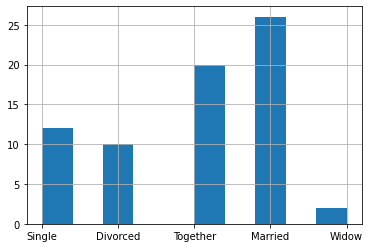

In [122]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Marital_Status'].hist()

Узнаем какой процент таких клиентов

In [123]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Marital_Status'].count() / df['Marital_Status'].count()

0.03180372557928214

### Образование

<AxesSubplot:>

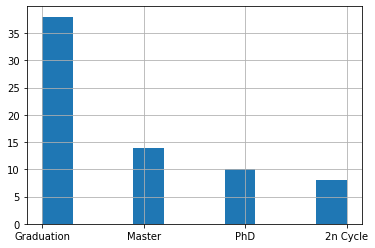

In [124]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Education'].hist()

### Количество детей

<AxesSubplot:>

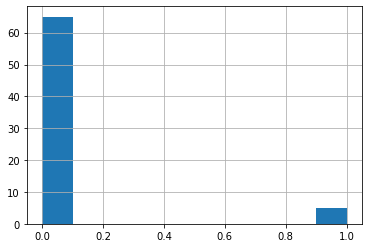

In [125]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Kidhome'].hist()

<AxesSubplot:>

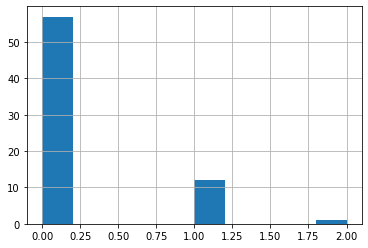

In [126]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Teenhome'].hist()

### Количество дней с последней покупки

<AxesSubplot:>

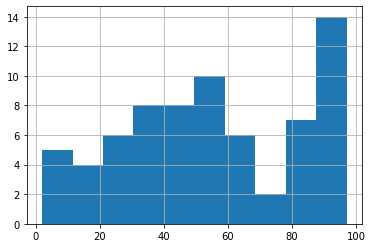

In [127]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Recency'].hist()

### Не покупали больше месяца

In [128]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много') & (df['Recency'] > 30)]['Recency'].count() / df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['Recency'].count()

0.7857142857142857

## Источники покупок

### Сайт

<AxesSubplot:>

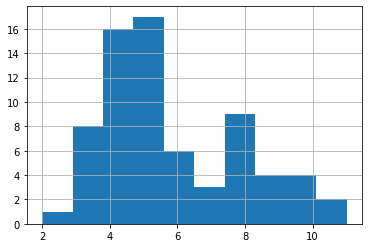

In [129]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['NumWebPurchases'].hist()

### Каталог

<AxesSubplot:>

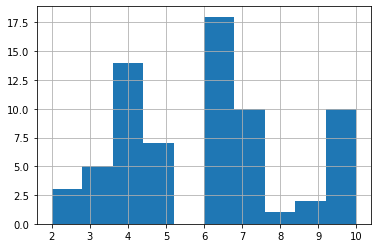

In [130]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['NumCatalogPurchases'].hist()

### Магазин

<AxesSubplot:>

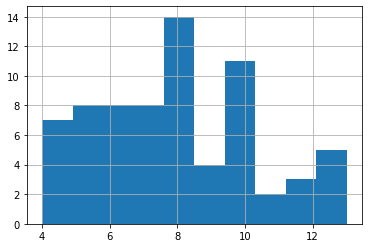

In [131]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['NumStorePurchases'].hist()

### Количество посещений сайта за последний месяц

<AxesSubplot:>

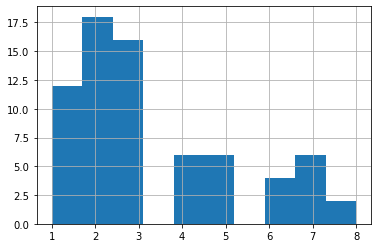

In [132]:
df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]['NumWebVisitsMonth'].hist()

### Промежуточные выводы

Мы видим, что таких клиентов 70 человек, что составляет 3.2% от общей массы, из них большая часть, а именно - 65%, замужем/женаты, либо состоят в отношениях. К данной группе относятся клиенты, в основном, не имеющие детей, редко заходящие на сайт и редко покупающие товары онлайн. Чаще покупают через каталог, либо в магазинах. 78% клиентов не совершали покупок больше 30-ти дней. Отсутствуют клиенты с базовым образованием.

### В данной группе клиентов нет

## Тратят мало на все категории товаров

### Количество клиентов в группе, семейный статус

<AxesSubplot:>

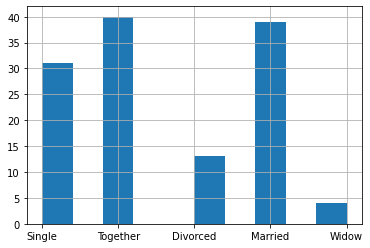

In [133]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Marital_Status'].hist()

In [134]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Marital_Status'].value_counts()

Together    40
Married     39
Single      31
Divorced    13
Widow        4
Name: Marital_Status, dtype: int64

In [135]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Marital_Status'].value_counts(normalize= True)

Together    0.314961
Married     0.307087
Single      0.244094
Divorced    0.102362
Widow       0.031496
Name: Marital_Status, dtype: float64

Узнаем какой процент таких клиентов

In [136]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Marital_Status'].count() / df['Marital_Status'].count()

0.05770104497955475

### Образование

<AxesSubplot:>

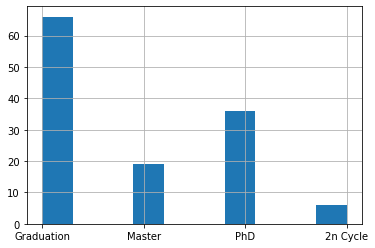

In [137]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Education'].hist()

### Количество детей

<AxesSubplot:>

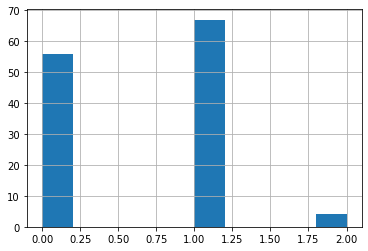

In [138]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Teenhome'].hist()

<AxesSubplot:>

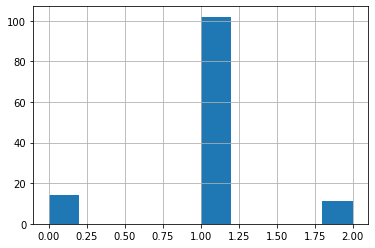

In [139]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Kidhome'].hist()

### Количество дней с последней покупки

<AxesSubplot:>

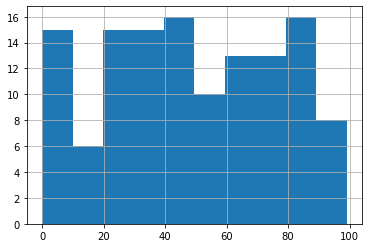

In [140]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Recency'].hist()

### Не покупали больше месяца

In [141]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало') & (df['Recency'] > 30)]['Recency'].count() / df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Recency'].count()

0.7165354330708661

## Источники покупок

### Сайт

<AxesSubplot:>

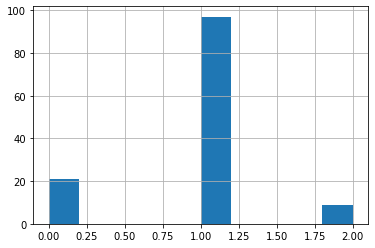

In [142]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['NumWebPurchases'].hist()

### Каталог

<AxesSubplot:>

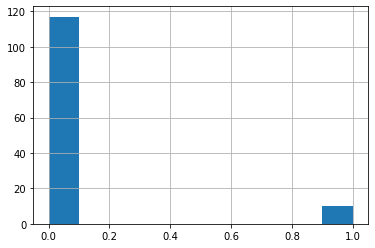

In [143]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['NumCatalogPurchases'].hist()

### Магазин

<AxesSubplot:>

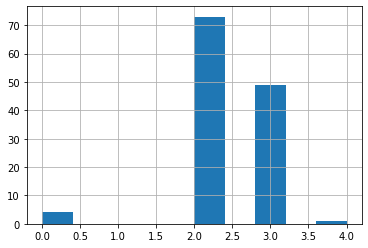

In [144]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['NumStorePurchases'].hist()

### Количество посещений сайта за последний месяц

<AxesSubplot:>

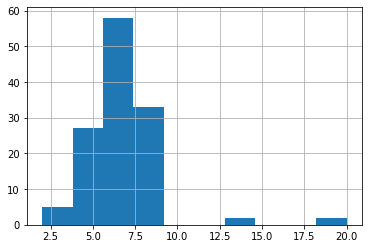

In [145]:
df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['NumWebVisitsMonth'].hist()

### Промежуточные выводы

В категории мало тратящих содержится 5.8% от общей массы клиентов, большая их часть женатых/замужних, либо людей в отношениях - 62%, имеющие одного ребенка. Покупки совершают на сайте, либо в магазине, практически не пользуются каталогом. 71% клиентов не совершали покупок больше 30-ти дней. 

## Тратят умеренно на все категории товаров


### Количество клиентов в группе, семейный статус

<AxesSubplot:>

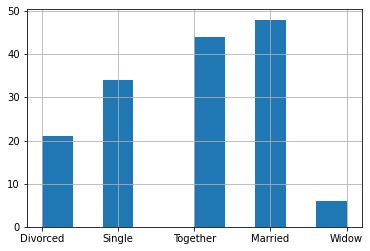

In [146]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Marital_Status'].hist()

In [147]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Marital_Status'].value_counts()

Married     48
Together    44
Single      34
Divorced    21
Widow        6
Name: Marital_Status, dtype: int64

In [148]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Marital_Status'].value_counts(normalize= True)

Married     0.313725
Together    0.287582
Single      0.222222
Divorced    0.137255
Widow       0.039216
Name: Marital_Status, dtype: float64

Узнаем какой процент таких клиентов

In [149]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Marital_Status'].count() / df['Marital_Status'].count()

0.06951385733757383

### Образование

<AxesSubplot:>

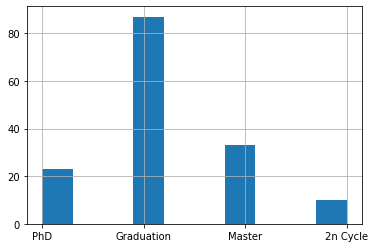

In [150]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Education'].hist()

### Количество детей

<AxesSubplot:>

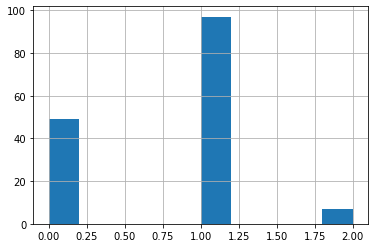

In [151]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Teenhome'].hist()

<AxesSubplot:>

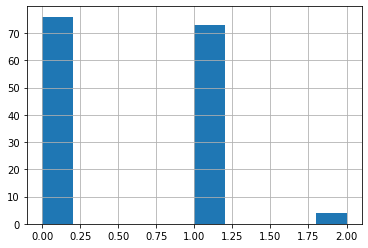

In [152]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Kidhome'].hist()

### Количество дней с последней покупки

<AxesSubplot:>

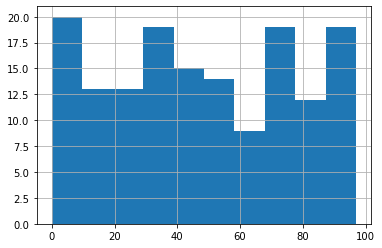

In [153]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Recency'].hist()

### Не покупали больше месяца

In [154]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно') & (df['Recency'] > 30)]['Recency'].count() / df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['Recency'].count()

0.6601307189542484

## Источники покупок

### Сайт

<AxesSubplot:>

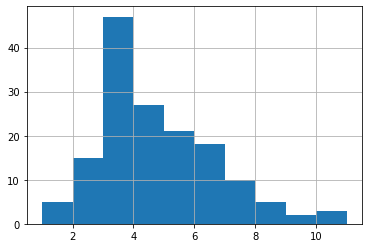

In [155]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['NumWebPurchases'].hist()

### Каталог

<AxesSubplot:>

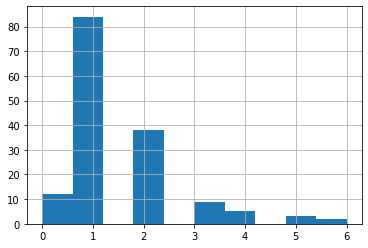

In [156]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['NumCatalogPurchases'].hist()

### Магазин

<AxesSubplot:>

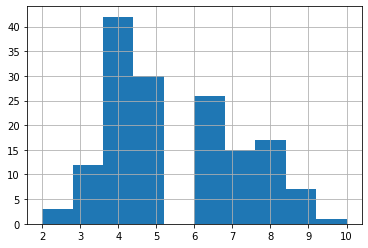

In [157]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['NumStorePurchases'].hist()

### Количество посещений сайта за последний месяц

<AxesSubplot:>

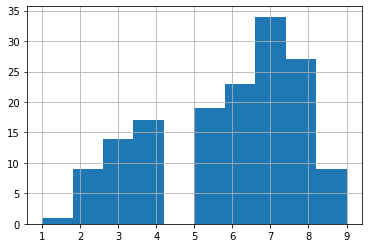

In [158]:
df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]['NumWebVisitsMonth'].hist()

### Промежуточные выводы

В категорию умеренно тратящих попало 7% от общей массы клиентов, из них 60% замужем/женаты, либо состоят в отношениях. Немного преобладают клиенты с одним ребенком над клиентами без детей. Много клиентов совершило одну покупку через каталог, но основная часть покупок совершается в магазине, чуть меньше на сайте. 66% из этой группы не совершали покупки больше 30-ти дней. 

In [159]:
many = df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много')]

In [160]:
small = df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]

In [161]:
medium = df[(df['wine_groups'] == 'Тратят умеренно') & (df['fruit_groups'] == 'Тратят умеренно') & (df['meat_groups'] == 'Тратят умеренно') & (df['fish_groups'] == 'Тратят умеренно') & (df['sweet_groups'] == 'Тратят умеренно') & (df['gold_groups'] == 'Тратят умеренно')]

In [162]:
filter_lst = ['Income', 'age', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

## Сравнение групп "много"-"мало"

### Покупки на сайте

In [163]:
small_web_purchases = round(small['NumWebPurchases'].mean())
many_web_purchases = round(many['NumWebPurchases'].mean())
print(f'Клиенты категории "много" в среднем совершают {many_web_purchases} покупок на сайте за расчетный период, а клиенты категории "мало" совершают в среднем {small_web_purchases} покупок')

Клиенты категории "много" в среднем совершают 6 покупок на сайте за расчетный период, а клиенты категории "мало" совершают в среднем 1 покупок


### Покупки в магазине

In [164]:
many_store = round(many['NumStorePurchases'].mean(), 2)
small_store = round(small['NumStorePurchases'].mean(), 2)
print(f'Клиенты категории "много" в среднем совершают {many_store} покупок в магазине за расчетный период, а клиенты категории "мало" совершают в среднем {small_store} покупок')

Клиенты категории "много" в среднем совершают 7.9 покупок в магазине за расчетный период, а клиенты категории "мало" совершают в среднем 2.34 покупок


### Покупки через каталог

In [165]:
many_catalog = round(many['NumCatalogPurchases'].mean(), 2)
small_catalog = round(small['NumCatalogPurchases'].mean(), 2)
print(f'Клиенты категории "много" в среднем совершают {many_catalog} покупок через каталог за расчетный период, а клиенты категории "мало" совершают в среднем {small_catalog} покупок')

Клиенты категории "много" в среднем совершают 5.94 покупок через каталог за расчетный период, а клиенты категории "мало" совершают в среднем 0.08 покупок


### Количество детей

In [166]:
many_kid = round(many['Kidhome'].mean(), 2) 
many_teen = round(many['Teenhome'].mean(), 2)
small_kid = round(small['Kidhome'].mean(), 2)
small_teen = round(small['Teenhome'].mean(), 2)
print(f'У клиентов категории "много" {many_kid} детей и {many_teen} подростков, а у клиентов категории "мало" - {small_kid} детей и {small_teen} подростков')

У клиентов категории "много" 0.07 детей и 0.2 подростков, а у клиентов категории "мало" - 0.98 детей и 0.59 подростков


### Количество дней с последней покупки

In [167]:
many_recency = round(many['Recency'].mean(), 2)
small_recency = round(small['Recency'].mean(), 2)
print(f'У клиентов категории "много" в среднем {many_recency} дней с последней покупки, а у клиентов категории "мало" {small_recency} дней')

У клиентов категории "много" в среднем 54.44 дней с последней покупки, а у клиентов категории "мало" 48.72 дней


### Не покупали больше месяца

In [168]:
many_recency_more30 = round(df[(df['wine_groups'] == 'Тратят много') & (df['fruit_groups'] == 'Тратят много') & (df['meat_groups'] == 'Тратят много') & (df['fish_groups'] == 'Тратят много') & (df['sweet_groups'] == 'Тратят много') & (df['gold_groups'] == 'Тратят много') & (df['Recency'] > 30)]['Recency'].count() / many['Recency'].count(), 2) * 100
small_recency_more30 = round(df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало') & (df['Recency'] > 30)]['Recency'].count() / df[(df['wine_groups'] == 'Тратят мало') & (df['fruit_groups'] == 'Тратят мало') & (df['meat_groups'] == 'Тратят мало') & (df['fish_groups'] == 'Тратят мало') & (df['sweet_groups'] == 'Тратят мало') & (df['gold_groups'] == 'Тратят мало')]['Recency'].count(), 2) * 100
print(f'В категории "много" больше месяца не совершали покупки {many_recency_more30} процентов клиентов, а среди категории "мало" {small_recency_more30} процентов')

В категории "много" больше месяца не совершали покупки 79.0 процентов клиентов, а среди категории "мало" 72.0 процентов


### Количество посещений сайта за последний месяц

In [169]:
many_web_visit = round(many['NumWebVisitsMonth'].mean(), 2)
small_web_visit = round(small['NumWebVisitsMonth'].mean(), 2)
print(f'Клиенты категории "много" посещали сайт {many_web_visit} раз за месяц, а клиенты категории "мало" {small_web_visit} раз')

Клиенты категории "много" посещали сайт 3.31 раз за месяц, а клиенты категории "мало" 6.72 раз


In [170]:
def compare(group_1, group_2, column_lst):
    for elem in column_lst:
        result = st.ttest_ind(group_1[elem], group_2[elem])
        p_value = round(result.pvalue, 4)
        first_mean = round(group_1[elem].mean(), 2)
        first_ci = st.norm.interval(alpha = 0.95, loc = np.mean(group_1[elem]), scale = st.sem(group_1[elem]))
        first_min_ci = round(first_ci[0], 2)
        first_max_ci = round(first_ci[1], 2)
        second_mean = round(group_2[elem].mean(), 2)
        second_ci = st.norm.interval(alpha = 0.95, loc = np.mean(group_2[elem]), scale = st.sem(group_2[elem]))
        second_min_ci = round(second_ci[0], 2)
        second_max_ci = round(second_ci[1], 2)
        if p_value > 0.05:
            print(f'Столбец: {elem} \nВ группе 1: среднее значение {first_mean}, доверительный интервал ({first_min_ci}, {first_max_ci}) \nВ группе 2: среднее значение {second_mean}, доверительный интервал ({second_min_ci}, {second_max_ci}) \nPvalue: {p_value} \nВывод: различий нет \n')
        else:
            if first_mean > second_mean:
                print(f'Столбец: {elem} \nВ группе 1: среднее значение {first_mean}, доверительный интервал ({first_min_ci}, {first_max_ci}) \nВ группе 2: среднее значение {second_mean}, доверительный интервал ({second_min_ci}, {second_max_ci}) \nPvalue: {p_value} \nВывод: различия есть (среднее группы 1 больше) \n')
            else:
                print(f'Столбец: {elem} \nВ группе 1: среднее значение {first_mean}, доверительный интервал ({first_min_ci}, {first_max_ci}) \nВ группе 2: среднее значение {second_mean}, доверительный интервал ({second_min_ci}, {second_max_ci}) \nPvalue: {p_value} \nВывод: различия есть (среднее группы 2 больше) \n')
         

### Сравнение Pvalue между группами "много"-"мало"
### Группа 1 - "много", группа 2 - "мало"

In [171]:
compare(many, small, filter_lst)

Столбец: Income 
В группе 1: среднее значение 75255.86, доверительный интервал (73206.57, 77305.14) 
В группе 2: среднее значение 32318.94, доверительный интервал (30446.34, 34191.55) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 54.66, доверительный интервал (50.99, 58.32) 
В группе 2: среднее значение 52.25, доверительный интервал (50.39, 54.11) 
Pvalue: 0.2039 
Вывод: различий нет 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.74, доверительный интервал (5.21, 6.27) 
В группе 2: среднее значение 0.91, доверительный интервал (0.82, 0.99) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 7.9, доверительный интервал (7.29, 8.51) 
В группе 2: среднее значение 2.34, доверительный интервал (2.22, 2.45) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.94, доверительный интерва

### Промежуточные выводы:
Заметны значительные различия в следующих столбцах:
- количество покупок сильно преобладает у группы "много" во всех трех случаях, при том, количество покупок через каталог у группы "мало" практически отсутствует, а через сайт покупок мало - 0.91
- наибольшее количество покупок внутри обеих групп происходит в магазинах
- количество детей/подростков практически отсутствует у группы "много"
- посещение сайта за месяц преобладает у группы "мало" в 2 раза 


### Сравнение Pvalue между группами "много"-"средне"
### Группа 1 - "много", группа 2 - "средне"

In [172]:
compare(many, medium, filter_lst)

Столбец: Income 
В группе 1: среднее значение 75255.86, доверительный интервал (73206.57, 77305.14) 
В группе 2: среднее значение 47040.35, доверительный интервал (45218.42, 48862.28) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 54.66, доверительный интервал (50.99, 58.32) 
В группе 2: среднее значение 56.34, доверительный интервал (54.58, 58.1) 
Pvalue: 0.3591 
Вывод: различий нет 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.74, доверительный интервал (5.21, 6.27) 
В группе 2: среднее значение 4.29, доверительный интервал (3.98, 4.6) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 7.9, доверительный интервал (7.29, 8.51) 
В группе 2: среднее значение 5.42, доверительный интервал (5.15, 5.7) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.94, доверительный интервал (

### Промежуточные выводы:
Заметны значительные различия в следующих столбцах:
- количество покупок преобладает у группы "много" во всех трех случаях
- обеими группами совершается много покупок через сайт
- наибольшее количество покупок внутри обеих групп происходит в магазинах
- количество детей/подростков преобладает у группы "средне"
- группа "средне" чаще посещает сайт

### Сравнение Pvalue между группами "средне"-"мало"
### Группа 1 - "средне", группа 2 - "мало"

In [173]:
compare(medium, small, filter_lst)

Столбец: Income 
В группе 1: среднее значение 47040.35, доверительный интервал (45218.42, 48862.28) 
В группе 2: среднее значение 32318.94, доверительный интервал (30446.34, 34191.55) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 56.34, доверительный интервал (54.58, 58.1) 
В группе 2: среднее значение 52.25, доверительный интервал (50.39, 54.11) 
Pvalue: 0.002 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumWebPurchases 
В группе 1: среднее значение 4.29, доверительный интервал (3.98, 4.6) 
В группе 2: среднее значение 0.91, доверительный интервал (0.82, 0.99) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 5.42, доверительный интервал (5.15, 5.7) 
В группе 2: среднее значение 2.34, доверительный интервал (2.22, 2.45) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 1.5

### Промежуточные выводы:
Заметны значительные различия в следующих столбцах:
- количество покупок преобладает у группы "средне" во всех трех случаях
- наибольшее количество покупок внутри обеих групп происходит в магазинах
- количество детей преобладает у группы "мало"
- количество подростков преобладает у группы "средне"
- посещение сайта чаще происходит у группы "мало"

### Создание столбца суммарных трат клиента на все категории товаров

In [174]:
df['total_sum'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Разделение клиентов на 3 группы по уровню суммарных трат  (0-25% тратят много, 25-75% тратят умеренно, 75-100% тратят мало)

In [175]:
df['total_sum_groups'] = pd.qcut(df['total_sum'], [0, 0.25, 0.75, 1], labels = ['Тратят мало', 'Тратят умеренно', 'Тратят много'])

In [176]:
many_total_sum = df[df['total_sum_groups'] == 'Тратят много']
medium_total_sum = df[df['total_sum_groups'] == 'Тратят умеренно']
small_total_sum = df[df['total_sum_groups'] == 'Тратят мало']

### Сравнение Pvalue групп "тратят много"-"тратят мало"

### Группа 1 - тратят много, Группа 2 - тратят мало

In [177]:
compare(many_total_sum, small_total_sum, filter_lst)

Столбец: Income 
В группе 1: среднее значение 74800.09, доверительный интервал (73905.42, 75694.76) 
В группе 2: среднее значение 30418.03, доверительный интервал (29519.98, 31316.08) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 55.21, доверительный интервал (54.12, 56.29) 
В группе 2: среднее значение 51.22, доверительный интервал (50.26, 52.18) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.67, доверительный интервал (5.46, 5.87) 
В группе 2: среднее значение 1.39, доверительный интервал (1.33, 1.46) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 8.53, доверительный интервал (8.3, 8.77) 
В группе 2: среднее значение 2.75, доверительный интервал (2.7, 2.81) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.81

### Промежуточные выводы:
в сравнении с прошлым исследованием цифры отличаются, но изменения не кардинальны
- количество покупок преобладает у группы 1 во всех трех случаях
- внутри обеих групп больше всего покупок совершается в магазинах
- группа 2 почти не совершает покупки через каталог
- у группы 1 почти нет детей
- по количеству подростков небольшой перевес в сторону группы 2
- группа 2 посещает сайт почти в 2 раза чаще 

### Сравнение Pvalue групп "тратят много" - "тратят умеренно"
### Группа 1 - тратят много, группа 2 - тратят умеренно

In [178]:
compare(many_total_sum, medium_total_sum, filter_lst)

Столбец: Income 
В группе 1: среднее значение 74800.09, доверительный интервал (73905.42, 75694.76) 
В группе 2: среднее значение 50778.08, доверительный интервал (49845.6, 51710.56) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 55.21, доверительный интервал (54.12, 56.29) 
В группе 2: среднее значение 55.23, доверительный интервал (54.55, 55.9) 
Pvalue: 0.9729 
Вывод: различий нет 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.67, доверительный интервал (5.46, 5.87) 
В группе 2: среднее значение 4.68, доверительный интервал (4.53, 4.83) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 8.53, доверительный интервал (8.3, 8.77) 
В группе 2: среднее значение 6.02, доверительный интервал (5.85, 6.19) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.81, доверительный интервал 

### Промежуточные выводы:
значимые различия в следующих данных:
- количество покупок преобладает у группы 1 во всех трех случаях
- внутри обеих групп больше всего покупок совершается в магазинах
- количество подростков у группы 2 в два раза больше 
- группа 2 чаще посещает сайт

### Сравнение Pvalue групп "тратят умеренно" - "тратят мало"
### Группа 1 - тратят умеренно, группа 2 - тратят мало

In [179]:
compare(medium_total_sum, small_total_sum, filter_lst)

Столбец: Income 
В группе 1: среднее значение 50778.08, доверительный интервал (49845.6, 51710.56) 
В группе 2: среднее значение 30418.03, доверительный интервал (29519.98, 31316.08) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 55.23, доверительный интервал (54.55, 55.9) 
В группе 2: среднее значение 51.22, доверительный интервал (50.26, 52.18) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumWebPurchases 
В группе 1: среднее значение 4.68, доверительный интервал (4.53, 4.83) 
В группе 2: среднее значение 1.39, доверительный интервал (1.33, 1.46) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 6.02, доверительный интервал (5.85, 6.19) 
В группе 2: среднее значение 2.75, доверительный интервал (2.7, 2.81) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 2.29,

### Промежуточные выводы:
значимые различия в следующих данных:
- количество покупок преобладает у группы 1 во всех трех случаях
- внутри обеих групп больше всего покупок совершается в магазинах
- группа 2 практически не совершает покупки через каталог
- количество детей группы 2 в два раза больше, чем у группы 1
- подростки преобладают у группы 1
- группа 1 чаще посещает сайт

### Разделение клиентов на 3 группы по уровню дохода (0-25% - зарабатывают мало, 25-75% - зарабатывают умеренно, 75-100% - зарабатывают много)

In [180]:
df['income_group'] = pd.qcut(df['Income'], [0, 0.25, 0.75, 1], labels = ['Зарабатывают мало', 'Зарабатывают умеренно', 'Зарабатывают много'])

In [181]:
high_income = df[df['income_group'] == 'Зарабатывают много']
medium_income = df[df['income_group'] == 'Зарабатывают умеренно']
low_income = df[df['income_group'] == 'Зарабатывают мало']

## Сравнение Pvalue групп по уровню дохода 

### Группа 1 - Зарабатывают много, Группа 2 - Зарабатывают мало

In [182]:
compare(high_income, low_income, filter_lst)

Столбец: Income 
В группе 1: среднее значение 78421.67, доверительный интервал (77817.96, 79025.39) 
В группе 2: среднее значение 25152.6, доверительный интервал (24536.15, 25769.05) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 55.22, доверительный интервал (54.13, 56.31) 
В группе 2: среднее значение 48.98, доверительный интервал (48.09, 49.86) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.37, доверительный интервал (5.18, 5.57) 
В группе 2: среднее значение 2.01, доверительный интервал (1.85, 2.17) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 8.46, доверительный интервал (8.23, 8.7) 
В группе 2: среднее значение 2.96, доверительный интервал (2.88, 3.04) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.63

### Группа 1 - Зарабатывают много, Группа 2 - Зарабатывают умеренно

In [183]:
compare(high_income, medium_income, filter_lst)

Столбец: Income 
В группе 1: среднее значение 78421.67, доверительный интервал (77817.96, 79025.39) 
В группе 2: среднее значение 51517.7, доверительный интервал (50940.21, 52095.19) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 55.22, доверительный интервал (54.13, 56.31) 
В группе 2: среднее значение 56.33, доверительный интервал (55.66, 56.99) 
Pvalue: 0.0749 
Вывод: различий нет 

Столбец: NumWebPurchases 
В группе 1: среднее значение 5.37, доверительный интервал (5.18, 5.57) 
В группе 2: среднее значение 4.5, доверительный интервал (4.34, 4.66) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 8.46, доверительный интервал (8.23, 8.7) 
В группе 2: среднее значение 5.94, доверительный интервал (5.76, 6.12) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 5.63, доверительный интервал 

### Группа 1 - Зарабатывают умеренно, Группа 2 - Зарабатывают мало

In [184]:
compare(medium_income, low_income, filter_lst)

Столбец: Income 
В группе 1: среднее значение 51517.7, доверительный интервал (50940.21, 52095.19) 
В группе 2: среднее значение 25152.6, доверительный интервал (24536.15, 25769.05) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: age 
В группе 1: среднее значение 56.33, доверительный интервал (55.66, 56.99) 
В группе 2: среднее значение 48.98, доверительный интервал (48.09, 49.86) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumWebPurchases 
В группе 1: среднее значение 4.5, доверительный интервал (4.34, 4.66) 
В группе 2: среднее значение 2.01, доверительный интервал (1.85, 2.17) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumStorePurchases 
В группе 1: среднее значение 5.94, доверительный интервал (5.76, 6.12) 
В группе 2: среднее значение 2.96, доверительный интервал (2.88, 3.04) 
Pvalue: 0.0 
Вывод: различия есть (среднее группы 1 больше) 

Столбец: NumCatalogPurchases 
В группе 1: среднее значение 2.24,

# Выводы по исследованию

## Общая информация:
- Портреты клиентов в нашем исследовании очень разнятся по всем показателям: по доходам, по расходам, в предпочтениях товаров, выборе источника покупок и прочем.  
- В ходе исследования была выявлена прямая зависимость уровня трат от уровня дохода, в связи с чем было принято решение разбивать наших клиентов на 3 группы по нескольким параметрам: по уровню трат на разные категории товаров, по суммарному уровню трат на все категории товаров и по уровню доходов. В каждом исследовании клиенты группировались в порядке возрастания: **первые 25%** (для удобства будем называть их "бедные клиенты") - клиенты с низким уровнем трат/доходов (в исследованиях - категория "мало"), **50%** ("средние клиенты") - клиенты со средним уровнем расходов/доходов (в исследованиях - категория "умеренно") и **последние 25%** ("богатые клиенты") - клиенты с высоким уровнем расходов/доходов (в исследованиях - категория "много").  
- Средний возраст клиентов 54 года, самый молодой 27 лет. Напрашивается расширение на более молодую аудиторию - детей и подростков.  
- В ходе исследования было выявлено, что средний показатель количества дней с последней покупки в наших группах варьируется в районе 48-50 дней, что очень много для магазина, который продает, в основном, товары для повседневного потребления. Этот показатель необходимо значительно уменьшать, вероятно, недостаточно рекламы, и необходима активная внешняя маркетинговая кампания. 
- Наш магазин устраивал 5 промо-кампаний, в которых участвовало максимум 7.4% клиентов, из чего так же можно предположить, что были недостаточные рекламные акции.  

## Выводы по группам
### "Бедные клиенты"
Клиенты, имеющие низкие доходы и расходы.  
- Клиенты этой группы практически не совершают покупки с помощью каталога, а в основном в магазине, реже - через сайт. Но в то же время, они чаще остальных заходят на сайт, вероятно, чтобы узнать цены определенных товаров. В связи с этим можно предположить, что если мы будем размещать на сайте сообщения о скидках, то это повысит конверсию по покупкам.  
- У этой группы наибольший средний показатель по количеству детей - 0.79. Можно начать торговать детскими товарами, детским питанием. У людей с маленькими детьми мало свободного времени, поэтому можно предложить им готовые идеи для быстрого приготовления завтрака/обеда/ужина.  
- Что нужно клиенту с низким достатком, чтобы он возвращался к нам вновь и вновь? Недорогие товары. Надо реализовывать более доступную товарную линейку для таких клиентов.

### "Средние клиенты"
Клиенты, имеющие средние доходы и расходы.  
- Клиенты этой группы совершают покупки и на сайте, и в магазине, и через каталог. Больше всего в магазине, меньше всего - каталог. Есть смысл распространять информацию о скидках и свежих поступлениях на сайте и в магазине. Можно периодически предлагать скидки на дорогие и премиальные товары.  
- У этой группы наибольший показатель по количеству подростков - 0.75. Подросткам мы можем предложить варианты готовой еды, ланч-боксов. Это предложение может быть востребовано в период отпусков родителей, либо пока они на работе.  
- Средний показатель по количеству детей в этой группе ниже - 0.45. Для них можно предложить более дорогие и качественные детские товары, питание, игрушки. Готовые идеи для завтрака/обеда/ужина так же могут иметь спрос.
- Средний класс много работает и, поэтому, можно предложить ему готовую еду, для экономии его времени.  

### "Богатые клиенты"
Клиенты, имеющие высокие доходы и расходы.  
- Клиенты этой группы совершают больше покупок, чем другие, из всех источников. Больше всего покупок производится в магазине, меньше всего - на сайте.  
- Через каталог заказывают преимущественно клиенты из этой группы, поэтому имеет смысл продвигать в каталогах наиболее премиальную продукцию.  
- На сайте они, совершают больше покупок, чем другие группы, поэтому там мы, в числе прочего, так же продвигаем премиальную продукцию.  
- Они тратят большие суммы на вино и мясо, и совершают много покупок в физическом магазине, поэтому, имеет смысл обосновать в нем отделы с элитным алкоголем и стейками.  
- У них довольно низкий средний показатель по подросткам (0.28) и детям (0.07), поэтому не имеет смысла разрабатывать для них отдельные решения.  

### Общие предложения
- Персонализированные спецпредложения в личном кабинете клиента могут увеличить конверсию. 
- Запуск мини пекарни в магазине. По мнению многих исследователей, запах свежей выпечки поднимает настроение и заставляет человека чувствовать себя более счастливым. Так же, он может пробудить аппетит и вынудить совершить импульсивные покупки.
- Организовать доставку продуктов. Это может пользоваться спросом среди "средних" и "богатых" клиентов, так как будет экономить их время. 